# Bank Client Data

In [1]:
# Importing Pandas library
import pandas as pd

In [2]:
# The code was removed by Watson Studio for sharing.

(45211, 17)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB



   # Bank Client Data:
   
   1 - age (numeric)   
   2 - job : type of job (categorical:   "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)   
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")  
   
   ### related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)  
  
   ### other attributes:
   
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)    
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")  

  ### Output variable (desired target):  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
# Looking for missing data:

for i in range(16):
    missing = pd.isna(df.iloc[:,i])
    print(df.columns.tolist()[i], missing.value_counts(), '\n')


age False    45211
Name: age, dtype: int64 

job False    45211
Name: job, dtype: int64 

marital False    45211
Name: marital, dtype: int64 

education False    45211
Name: education, dtype: int64 

default False    45211
Name: default, dtype: int64 

balance False    45211
Name: balance, dtype: int64 

housing False    45211
Name: housing, dtype: int64 

loan False    45211
Name: loan, dtype: int64 

contact False    45211
Name: contact, dtype: int64 

day False    45211
Name: day, dtype: int64 

month False    45211
Name: month, dtype: int64 

duration False    45211
Name: duration, dtype: int64 

campaign False    45211
Name: campaign, dtype: int64 

pdays False    45211
Name: pdays, dtype: int64 

previous False    45211
Name: previous, dtype: int64 

poutcome False    45211
Name: poutcome, dtype: int64 



In [6]:
# working on 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
D_months = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month'].replace(to_replace = D_months,  inplace=True)
print(df['month'])


0         5
1         5
2         5
3         5
4         5
5         5
6         5
7         5
8         5
9         5
10        5
11        5
12        5
13        5
14        5
15        5
16        5
17        5
18        5
19        5
20        5
21        5
22        5
23        5
24        5
25        5
26        5
27        5
28        5
29        5
         ..
45181    11
45182    11
45183    11
45184    11
45185    11
45186    11
45187    11
45188    11
45189    11
45190    11
45191    11
45192    11
45193    11
45194    11
45195    11
45196    11
45197    11
45198    11
45199    11
45200    11
45201    11
45202    11
45203    11
45204    11
45205    11
45206    11
45207    11
45208    11
45209    11
45210    11
Name: month, Length: 45211, dtype: int64


In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month         int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Exploring Data!

In [27]:
j = df['job']
j.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [38]:
#Grouping age in 4 bins
import numpy as np
bins = np.linspace(min(df['age']), max(df['age']), 4)
print('max = ',  max(df['age']), 'min = ', min(df['age']))
group_names = ["young", "adult", "senior"]
df['age_binned'] = pd.cut(df['age'], bins, labels = group_names, include_lowest = 'true')

max =  95 min =  18


In [39]:
df['age_binned'].head()

0    adult
1    adult
2    young
3    adult
4    young
Name: age_binned, dtype: category
Categories (3, object): [young < adult < senior]

In [40]:
a = df['age_binned']
a.value_counts()

young     28411
adult     16246
senior      554
Name: age_binned, dtype: int64

In [41]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_binned
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,adult
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,adult
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,young
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,adult
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,young


In [42]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [43]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [44]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [45]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

## Some Graphics

In [46]:
import seaborn as sns

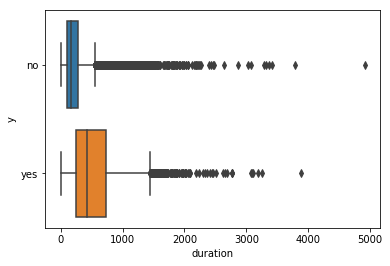

In [49]:
#Does the call lenght matters?
sns.boxplot(x = 'duration', y = 'y', data = df)

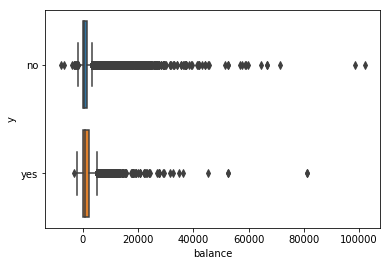

In [50]:
#Does the balance matters?
sns.boxplot(x = 'balance', y = 'y', data = df)

In [51]:
from scipy import stats

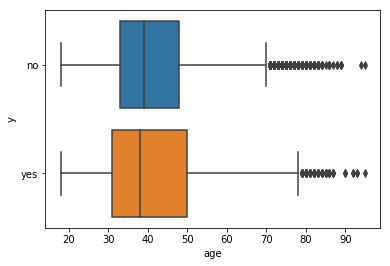

In [53]:
#Does the age matters?
sns.boxplot(x = 'age', y = 'y', data = df)